## Python Week 7

November 9, 2019

If the installation was done properly on October 26, we are ready to start machine learning projects.
In the following weeks, we'll make a team and pick a project that you are interested in. In order to give you better ideas and understand what AI can do, we'll go over a few examples drawn from engineering and science. 

Today, let's start with number recognition and image denoising using autoencoder.
We'll use the dataset that we previously played with for our plotting. So the data should be in your cloned repository.


In [147]:
import numpy as np
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout


## keras functions are well documented in the Keras Documentaion 
## https://keras.io


In [148]:
Xtest3D = np.load('xtest.pickle', allow_pickle=True)
Ytest = np.load('ytest.pickle', allow_pickle=True)

In [149]:
Xtrain3D = np.load('xtrain.pickle', allow_pickle=True)
Ytrain = np.load('ytrain.pickle', allow_pickle=True)

In [150]:
## original images have unsigned integer from 0 to 255 (8bit representation of gray scale color) 
## Since the convolutions are numerical computation, we change the data type to float32 and then 
## perform normalizations to [0,1] range

Xtest3D = Xtest3D.astype('float32')/255.
Xtrain3D = Xtrain3D.astype('float32')/255.

In [205]:
## in order to conform to the shape of inputs to Conv2D
## Conv2D expects 4D array
## 1st index - sample index
## 2nd index - image x
## 3rd index - image y
## 4th index - channel (Ex. RGB values in color images)

Xtest = Xtest3D.reshape((*Xtest3D.shape, 1))
Xtrain = Xtrain3D.reshape((*Xtrain3D.shape, 1))

In [206]:
## Since the computing power and time is limitted, let's reduce the size of training and test datasets 
Xtest = Xtest[0:100,:]
Xtrain = Xtrain[0:600,:]
Ytest = Ytest[0:100]
Ytrain = Ytrain[0:600]

In [207]:
## Let's check the shape and type of the our test dataset

print(Xtest.shape, Ytest.shape)
print(Xtest.dtype, Ytest.dtype)

(100, 28, 28, 1) (100,)
float32 uint8


In [202]:
print(Xtrain.shape, Ytrain.shape)
print(Xtrain.dtype, Ytrain.dtype)

(600, 28, 28) (600,)
float32 uint8


In [210]:

def model(choice = 2):
    '''
    input parameters
      choice - 1, classification of mnist handwriting images
               2, encoding and decoding for denoising
               
    output
      keras model defining the network from an input to the final output
    '''
    
    
    input_img = Input(shape=(28, 28, 1))
    x1 = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
    x2 = MaxPooling2D((2,2), padding='same')(x1)
    x3 = Conv2D(32, (3,3), activation='relu', padding='same')(x2)
    
    encoded = MaxPooling2D((2,2), padding='same')(x3)
    c1 = Flatten()(encoded)
    c2 = Dense(128, activation='relu')(c1)
    c3 = Dropout(0.2)(c2)
    
    ## this is the final output for classification
    classifierOutput = Dense(10, activation='softmax')(c3)
    
    ## The following layers from y4 to decoded is for denoising
    ## we'll cover this in the next meeting
    y4 = Conv2D(32, (3,3), activation='relu', padding='same')(encoded)
    y3 = UpSampling2D((2,2))(y4)
    y2 = Conv2D(32, (3,3), activation='relu', padding='same')(y3)
    y1 = UpSampling2D((2,2))(y2)
    
    decoded = Conv2D(1, (3,3), activation='sigmoid', padding='same')(y1)
    
    if choice == 1:
        return Model(input_img, classifierOutput)
    else: 
        
        ## This part is for the next meeting
        
        return Model(input_img, decoded)    

In [218]:
## Here we call a function and get our model defintion.
myclassifier = model(1)

In [219]:
## Once a model is defined, we need to configure the model for trainging 
## by selecting optimizer and loss function

myclassifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [220]:
## This is the traing stage that is compute intensive and may require high performance computers
## or GPU machines if the size of the training dataset is huge
## 
## In the begining of notebook, we decimated the size of the training dataset to finish our meeting on time
## If you increase the epochs, the number of data repetition,
## the running time will increase linearly proportional to the epochs.
myclassifier.fit(Xtrain, Ytrain, epochs=20, batch_size=128)

Epoch 1/20
600/600 [==============================] - 1s 2ms/step - loss: 2.2227 - acc: 0.2650
Epoch 2/20
600/600 [==============================] - 0s 568us/step - loss: 1.8940 - acc: 0.5317
Epoch 3/20
600/600 [==============================] - 0s 565us/step - loss: 1.3713 - acc: 0.6983
Epoch 4/20
600/600 [==============================] - 0s 567us/step - loss: 0.9239 - acc: 0.7517
Epoch 5/20
600/600 [==============================] - 0s 566us/step - loss: 0.6760 - acc: 0.7883
Epoch 6/20
600/600 [==============================] - 0s 568us/step - loss: 0.5723 - acc: 0.8183
Epoch 7/20
600/600 [==============================] - 0s 566us/step - loss: 0.4970 - acc: 0.8500
Epoch 8/20
600/600 [==============================] - 0s 588us/step - loss: 0.4048 - acc: 0.8683
Epoch 9/20
600/600 [==============================] - 0s 568us/step - loss: 0.3662 - acc: 0.8900
Epoch 10/20
600/600 [==============================] - 0s 566us/step - loss: 0.3092 - acc: 0.9000
Epoch 11/20
600/600 [==========

In [221]:
Xpred = myclassifier.predict(Xtest)

In [232]:
myclassifier.evaluate(Xtest, Ytest)

100/100 [==============================] - 0s 371us/step


[0.22455505013465882, 0.94]

In [234]:
# In the above, the test accuracy is 94%
# Our model made wrong predictions in 6 cases out of 100.

In [235]:
## Now, let's find out which image (handwriting) is not understood(classified) correctly.
XpredFinal = [np.argmax(x) for x in Xpred]

In [236]:
XpredFinalArray = np.array(XpredFinal, dtype='float32')
YtestFinalArray = Ytest.astype('float32')

In [237]:
Errors = Ytest - XpredFinalArray

In [238]:
maxErrorLocation = np.argmax(np.abs(Errors))

In [239]:
ximage = Xtest[maxErrorLocation,  :]

In [240]:
ximage2d = ximage.reshape(ximage.shape[0], ximage.shape[1])

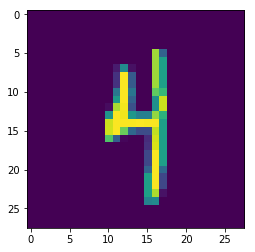

In [241]:
import matplotlib.pyplot as plt
plt.imshow(ximage2d)

# this figure looks 4 but at the same time, it is close to 9.
# our model predition is 9. But it is not totally wrong, I think.


In [230]:
# prediction 
print(XpredFinalArray[maxErrorLocation])

9.0


In [231]:
# Correction Answer
print(Ytest[maxErrorLocation])

4
